11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1452 - accuracy: 0.9549 - val_loss: 0.0413 - val_accuracy: 0.9875
Epoch 2/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0456 - accuracy: 0.9856 - val_loss: 0.0339 - val_accuracy: 0.9888
Epoch 3/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0313 - val_accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 5/5
313/313 [==============================] - 4s 13ms/step - loss: 0.0258 - accuracy: 0.9921
Test accuracy: 0.9921000003814697


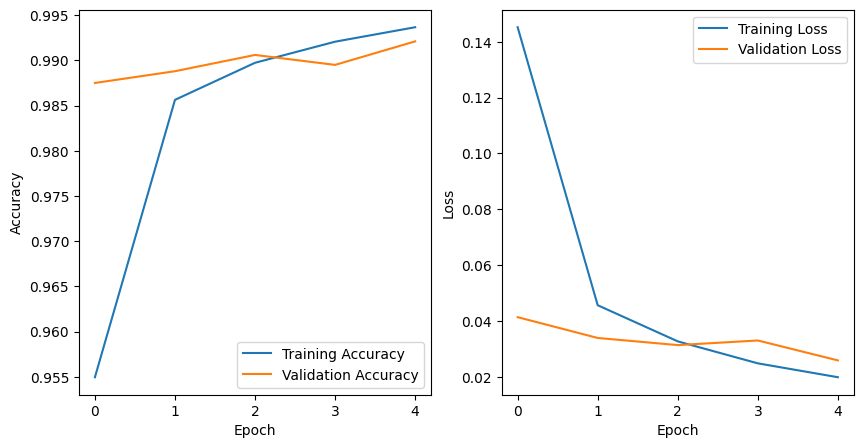

313/313 [==============================] - 3s 9ms/step
Confusion Matrix:
[[ 975    1    0    0    0    0    2    1    1    0]
 [   0 1128    2    1    0    1    1    2    0    0]
 [   0    0 1030    0    1    0    0    1    0    0]
 [   0    0    3 1001    0    4    0    0    1    1]
 [   0    0    0    0  977    0    0    1    0    4]
 [   0    0    0    4    0  883    3    0    1    1]
 [   0    2    0    0    1    1  954    0    0    0]
 [   0    2    6    0    0    0    0 1019    0    1]
 [   3    0    3    0    0    0    3    2  960    3]
 [   1    0    0    1    5    2    1    1    4  994]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99    

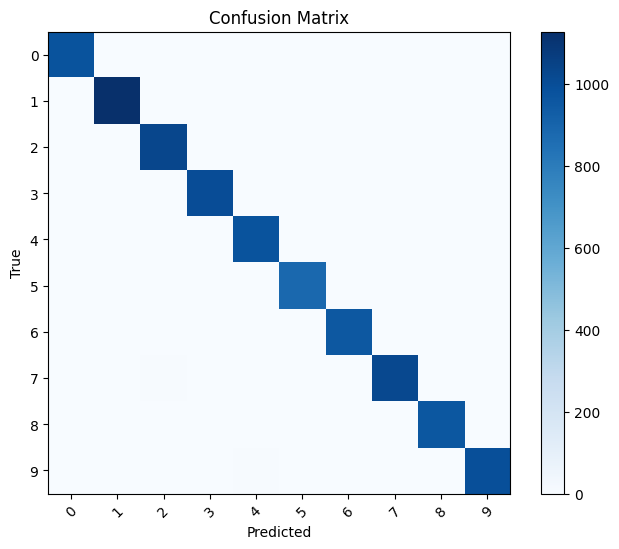

313/313 [==============================] - 3s 9ms/step


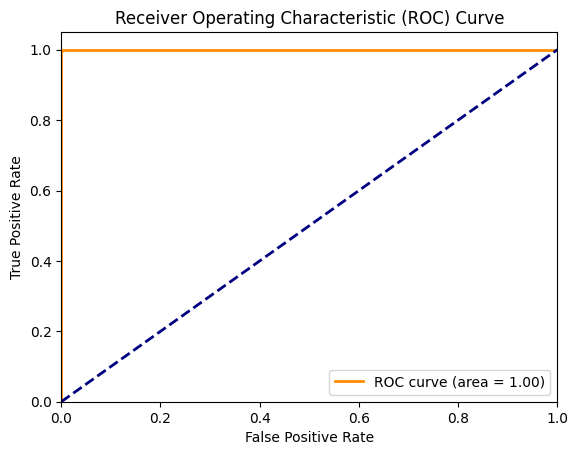

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np

# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images[..., tf.newaxis], train_labels, epochs=5, validation_data=(test_images[..., tf.newaxis], test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images[..., tf.newaxis], test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Additional performance evaluation
y_pred = np.argmax(model.predict(test_images[..., tf.newaxis]), axis=1)
print("Confusion Matrix:")
cm = confusion_matrix(test_labels, y_pred)
print(cm)

print("\nClassification Report:")
print(classification_report(test_labels, y_pred, target_names=[str(i) for i in range(10)]))

# Plot the Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, [str(i) for i in range(10)], rotation=45)
plt.yticks(tick_marks, [str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve (for binary classification)
# In this example, we'll demonstrate the ROC curve for digit "0" vs. "not 0."
from sklearn.metrics import roc_curve, auc

# Convert labels to binary: 1 if the digit is 0, 0 otherwise
binary_test_labels = np.where(test_labels == 0, 1, 0)

# Get predicted probabilities for class 1 (digit 0)
y_score = model.predict(test_images[..., tf.newaxis])[:, 0]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(binary_test_labels, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
